# Chapter 5. Statistics

## Describing a Single Set of Data

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

Text(0, 0.5, '# of people')

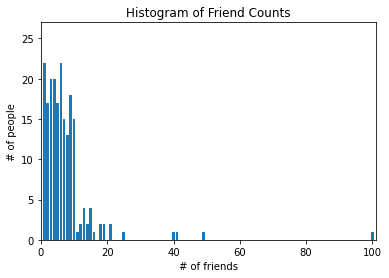

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

friend_counts = Counter(num_friends)
x_lim = max(friend_counts) + 1
y_lim = max(friend_counts.values()) + 5
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(x=xs, height=ys)
plt.axis([0, x_lim, 0, y_lim])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')

In [3]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)

### Central Tendencies

In [5]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

UsageError: Line magic function `%paste` not found.


In [7]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [13]:
assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [14]:
print(median(num_friends))

6.0


In [15]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [18]:
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [19]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [20]:
assert set(mode(num_friends)) == {1, 6}

### Dispersion

In [21]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [22]:
assert data_range(num_friends) == 99